**Machine Learning and Music: Popularity Prediction and Recommendation Clustering**

**Objectives**
Build a model to predict song popularity using track attributes and create classification models for recommending similar songs or artists.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading and cleaning the dataset

In [ ]:
#load the dataset
df = pd.read_csv('spotify_songs.csv')
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [ ]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
df.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
# Look for missing data
df[df.isnull().any(axis=1)]

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
8151,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,HIP&HOP,5DyJsJZOpMJh34WvUrQzMV,rap,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707
9282,5cjecvX0CmC9gK0Laf5EMQ,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,11,-5.364,0,0.3190,0.0534,0.00000,0.5530,0.191,146.153,202235
9283,5TTzhRSWQS4Yu8xTgAuq6D,NaN,NaN,0,3luHJEPw434tvNbme3SP8M,NaN,2017-12-01,GANGSTA Rap,5GA8GDo7RQC3JEanT81B3g,rap,...,10,-5.907,0,0.3070,0.0963,0.00000,0.0888,0.505,86.839,206465
19568,3VKFip3OdAvv4OfNTgFWeQ,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,Reggaeton viejito🔥,0si5tw70PIgPkY1Eva6V8f,latin,...,11,-6.075,0,0.0366,0.0606,0.00653,0.1030,0.726,97.017,252773
19811,69gRFGOWY9OMpFJgFol1u0,NaN,NaN,0,717UG2du6utFe7CdmpuUe3,NaN,2012-01-05,latin hip hop,3nH8aytdqNeRbcRCg3dw9q,latin,...,6,-7.635,1,0.1760,0.0410,0.00000,0.1160,0.649,95.999,282707


In [ ]:
# drop the missing data and reset index
df.dropna(inplace=True)
df.reset_index(inplace=True,drop=True)

In [ ]:
# confirm songs are only in there once
len(df['track_id'].unique())

28352

In [ ]:
# as there are duplicates in the track_id, we are going to drop the duplicates and keep the first one
df.drop_duplicates('track_id', inplace=True, keep='first')
df.reset_index(inplace=True,drop=True)
df

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28347,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
28348,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
28349,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
28350,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


# Exploring the dataset

In [ ]:
numerical_preds = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

<Axes: >

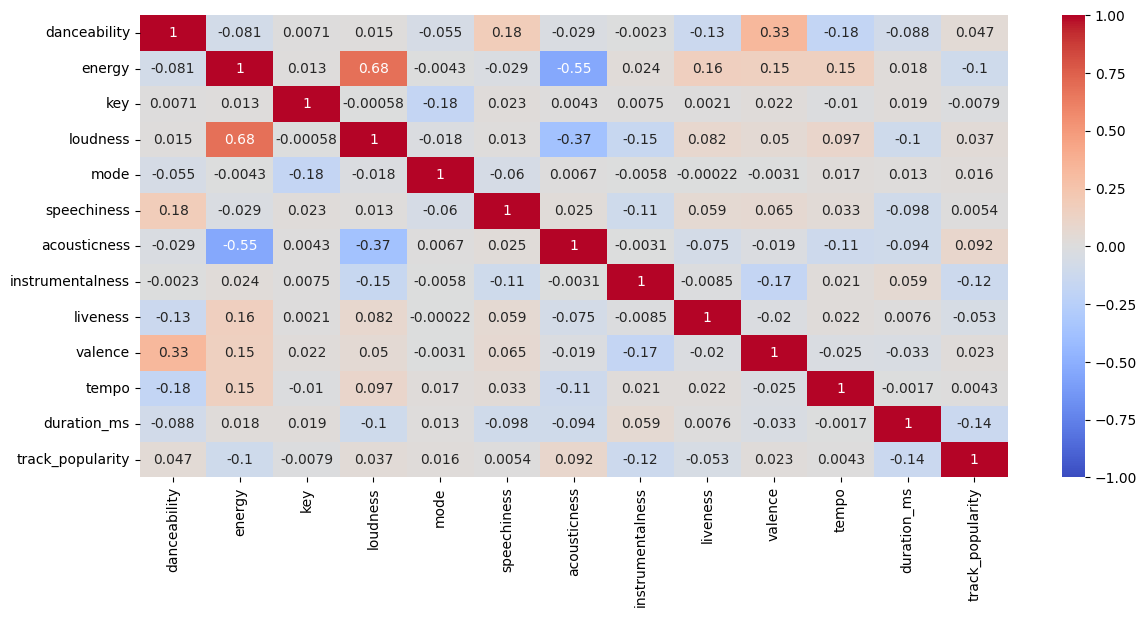

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df[numerical_preds+['track_popularity']].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

Strongest positive correlation with popularity is acousticness. Strongest anticorrelation with popularity are duration, instrumentalness, and energy.

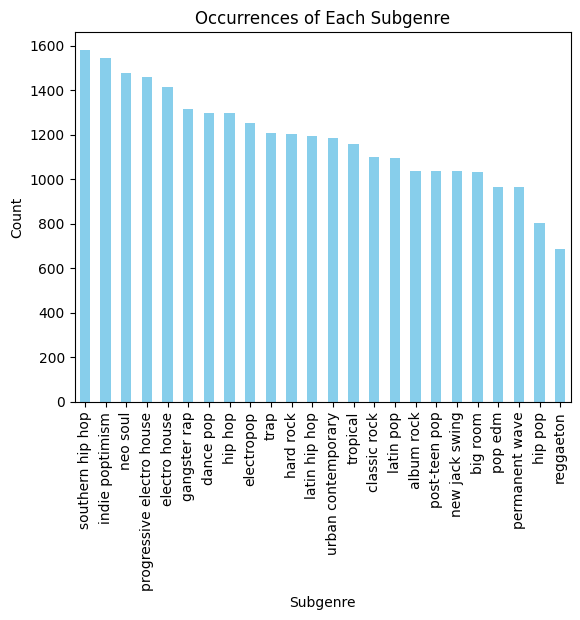

In [ ]:
value_counts = df['playlist_subgenre'].value_counts()
# Plot the occurrences
plt.figure()
value_counts.plot(kind='bar', color='skyblue')
plt.title('Occurrences of Each Subgenre')
plt.xlabel('Subgenre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

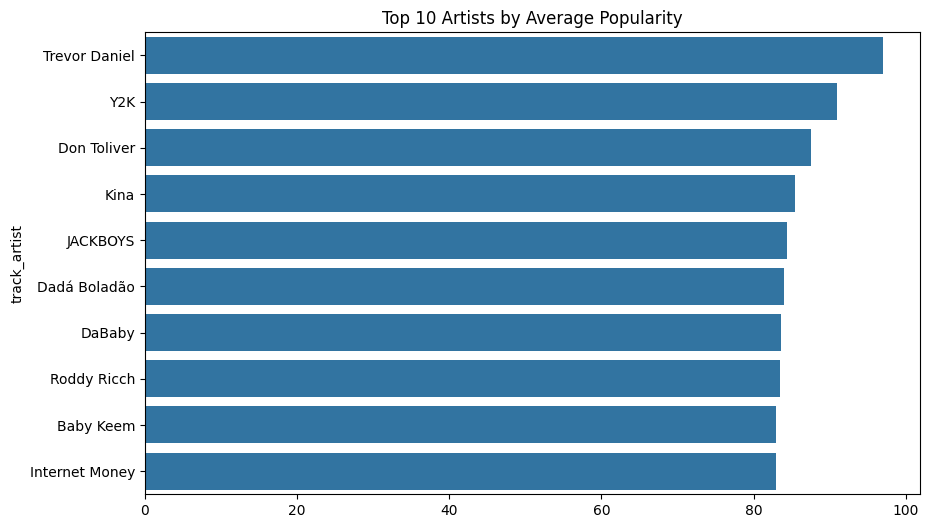

In [ ]:
# Top artists by popularity
top_artists = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Average Popularity')
plt.show()

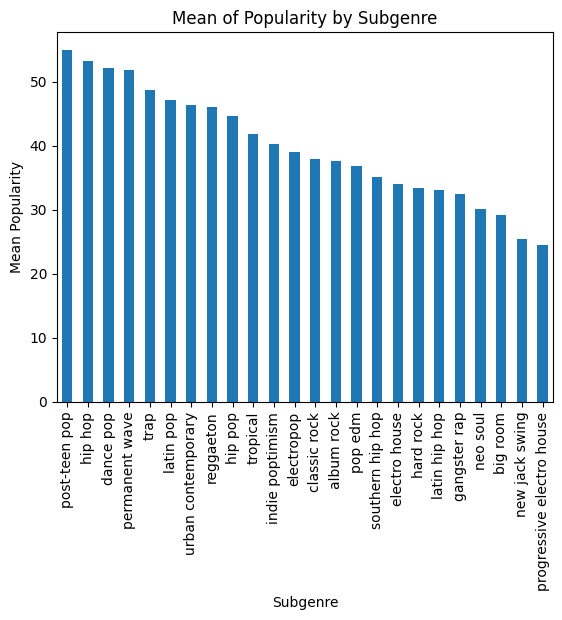

In [ ]:
sub_genre_pop_mean = df.groupby('playlist_subgenre')['track_popularity'].mean()
sub_genre_pop_mean = sub_genre_pop_mean.sort_values(ascending=False)  # Sort descending
sub_genre_pop_mean.plot(kind='bar')
plt.xlabel('Subgenre')
plt.ylabel('Mean Popularity')
plt.title('Mean of Popularity by Subgenre')
plt.show()

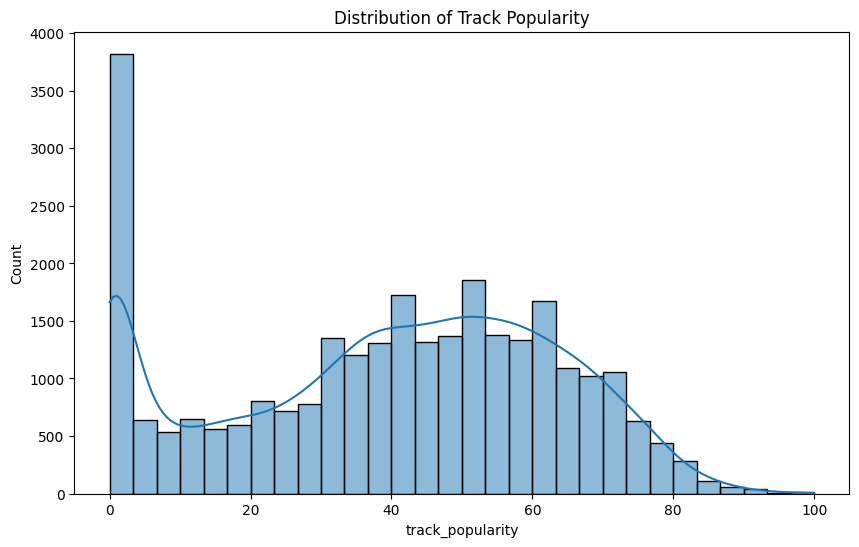

In [ ]:
# Popularity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.show()
#df['track_popularity'].hist(bins=20,range=(0,100))

# Random Forest model

In [ ]:
# Make a copy of the data
df_rf = df
print(df.shape)

(28352, 23)


In [ ]:
# build a mode to predict popularity
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Normalizer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
categorical_vars = ['key', 'playlist_genre', 'playlist_subgenre', 'track_artist']
discrete_vars = ['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

#### Now let's build a pipeline for preprocessing the numerical and categorical attributes:

In [ ]:
# Numerical Pipeline: Standardizes numerical features
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical Pipeline: One-hot encodes categorical features
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, discrete_vars),
    ('cat', cat_pipeline, categorical_vars)
])
# ######################################

X = df_rf[categorical_vars + discrete_vars]
y = df_rf['track_popularity'].copy()

Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77) #stratified sampling based on the target

Train Random Forest model

In [ ]:
# Full pipeline example
pipeline_full = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rfr(n_estimators=100, random_state=42))
])
model_rf = pipeline_full.fit(X_train, y_train)

# Evaluate
y_pred_rf = model_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

y_pred_train_rf = model_rf.predict(X_train)

print('r2_score of train data')
print(r2_score(y_train,y_pred_train_rf))
print('r2_score of test data')
print(r2_score(y_test,y_pred_rf))

print(f'Root Mean Squared Error: {rmse_rf}')

r2_score of train data
0.8785567052553862
r2_score of test data
0.19211771988498327
Root Mean Squared Error: 21.371732359498914


### Random Forest with hyperparameter tuning

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'regressor__n_estimators': 200, 'regressor__min_samples_split': 10, 'regressor__min_samples_leaf': 1, 'regressor__max_features': 'log2', 'regressor__max_depth': None, 'regressor__bootstrap': False}
Tuned Model RMSE: 20.677007872938812
Improvement from baseline: 0.69


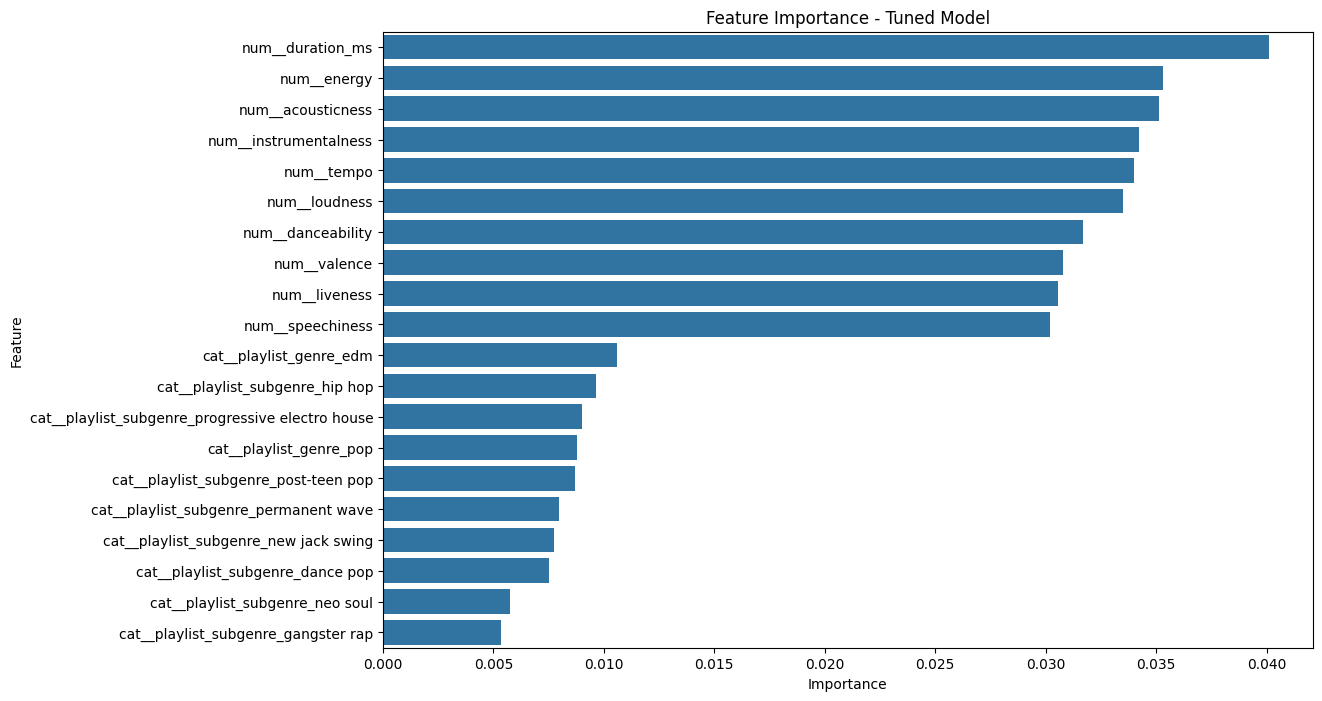

In [ ]:
# Define the parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 5, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['sqrt', 'log2'],
    'regressor__bootstrap': [True, False]
}

# Full pipeline example
pipeline_full = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', rfr(random_state=42))
])

# Randomized search with 50 iterations
rf_random = RandomizedSearchCV(
    pipeline_full,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the random search model
rf_random.fit(X_train, y_train)

# Get best parameters
best_params = rf_random.best_params_
print(f"Best parameters: {best_params}")

# Train final model with best parameters
final_model = rf_random.best_estimator_
final_model.fit(X_train, y_train)

# Evaluate
y_pred_tuned = final_model.predict(X_test)
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print(f"Tuned Model RMSE: {rmse_tuned}")
print(f"Improvement from baseline: {rmse_rf - rmse_tuned:.2f}")

# Get feature names
feature_names = final_model.named_steps['preprocessor'].get_feature_names_out(
    input_features=X_train.columns
)

# Get feature importances from the model
importances = final_model.named_steps['regressor'].feature_importances_

# Feature importance with tuned model
feature_importance_tuned = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_tuned.head(20))
plt.title('Feature Importance - Tuned Model')
plt.show()

In [ ]:
# build a model to predict popularity
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

categorical_vars = ['playlist_subgenre','track_artist']
discrete_vars = numerical_preds
pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])
pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])
pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, categorical_vars), ("numerical", pipeline_numerical, discrete_vars),])

X = df[categorical_vars + discrete_vars]
y = df['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77) #stratified sampling based on the target
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

In [ ]:
# this took a long time to run so just commenting it out for now, feel free to test on your ownS
#rfr_mod = rfr(random_state=77)
#param_grid = {'max_depth': [25, 50, 75, 100],
#             'min_samples_split':[25,50,100,125],
#             'n_jobs':[-1],
#             'n_estimators':[100,1000,5000],
#             'min_samples_leaf':[5,10]}
#grid_search_rfr = GridSearchCV(estimator=rfr_mod,
#                           param_grid=param_grid,
#                           scoring='r2',
#                           cv=4)
#grid_search_rfr.fit(X=X_train_transformed, y=np.ravel(y_train))
#print(grid_search_rfr.best_params_)
#print("\n",grid_search_rfr.best_estimator_)

In [ ]:
# These hyperparameters were chosen by the section above ran on a very very powerful machine
# Run the below with caution as it will also take a while
# model_rf = rfr(max_depth=75, min_samples_leaf=5, min_samples_split=50,
#                      n_estimators=1000, n_jobs=-1, random_state=77)
# model_rf.fit(X_train_transformed, y_train)
# y_pred_rf = model_rf.predict(X_test_transformed)


KeyboardInterrupt: 

In [ ]:
# y_pred_rf = model_rf.predict(X_test_transformed)
# y_pred_train = model_rf.predict(X_train_transformed)

# print(r2_score(y_train,y_pred_train))
# print(r2_score(y_test,y_pred_rf))

IndexError: list index out of range

The output of the code block above (without having to run it): 0.4312305784124737,
0.1977819661555288

(0.0, 100.0)

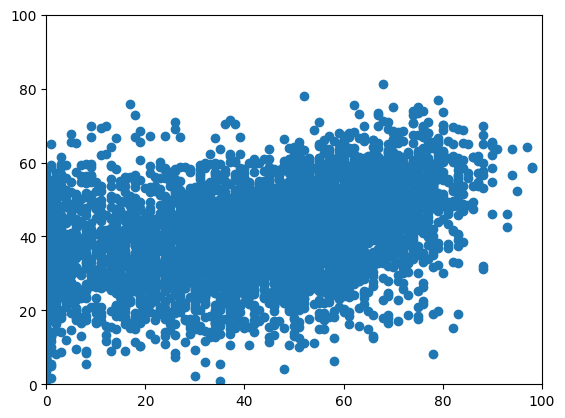

In [ ]:
plt.scatter(y_test,y_pred_rf)
plt.ylim(0,100)
plt.xlim(0,100)

In [ ]:
# plt.scatter(y_train,y_pred_train)
# plt.ylim(0,100)
# plt.xlim(0,100)

NameError: name 'y_pred_train' is not defined

# The Outliers Experiment

A correlation matrix can be significantly affected by outliers.

In [ ]:
df['track_popularity'].value_counts()

,count
track_popularity,
0,2616
1,546
51,484
57,479
50,474
...,...
97,3
95,2
96,1


Our dataset has 2616 tracks with popularity of 0 (8.72% of the dataset). So what would happen if we dropped them from the dataset?

In [ ]:
# Create a copy of the dataset
dfpop=df.copy()

In [ ]:
# Drop the tracks with 0 popularity and reset the index
dfpop.drop(dfpop[dfpop['track_popularity'] == 0].index, inplace = True)
dfpop.reset_index(inplace=True,drop=True)

In [ ]:
dfpop['track_popularity'].value_counts()

,count
track_popularity,
1,546
51,484
57,479
50,474
54,474
...,...
97,3
95,2
96,1


In [ ]:
numerical_preds = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']

In [ ]:
##Correlations using Pearson
corr_matrix = dfpop.loc[:, ['track_popularity'] + numerical_preds].corr(method='pearson')
corr_matrix['track_popularity'].sort_values(ascending=False)

,track_popularity
track_popularity,1.000000
acousticness,0.068815
loudness,0.051641
danceability,0.039475
valence,0.037479
mode,0.016025
speechiness,0.011059
tempo,0.009397
key,0.001862
liveness,-0.034178


We see that without 0 popularity tracks the correlations of other features in relation to track popularity changed. "Acousticness" is now at 0.068815 (from 0.092).

Let's feed this dataset into the same RandomForestRegressor model and see what happens.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

categorical_vars = ['playlist_subgenre','track_artist']
discrete_vars = numerical_preds
pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])
pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])
pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, categorical_vars), ("numerical", pipeline_numerical, discrete_vars),])

#Modified dataset - no 0 popularity tracks
X = dfpop[categorical_vars + discrete_vars]
y = dfpop['track_popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77) #stratified sampling based on the target
pipeline_full.fit(X_train)
X_train_transformed = pipeline_full.transform(X_train)
X_test_transformed = pipeline_full.transform(X_test)

In [ ]:
model_rf = rfr(max_depth=75, min_samples_leaf=5, min_samples_split=50,
                      n_estimators=1000, n_jobs=-1, random_state=77)
model_rf.fit(X_train_transformed, y_train)

RandomForestRegressor(max_depth=75, min_samples_leaf=5, min_samples_split=50,
                      n_estimators=1000, n_jobs=-1, random_state=77)

In [ ]:
y_pred_rf = model_rf.predict(X_test_transformed)
y_pred_train = model_rf.predict(X_train_transformed)

print(r2_score(y_train,y_pred_train))
print(r2_score(y_test,y_pred_rf))

0.4046068045616257
0.176324453991069


Looks like the results are negatively affected. (R2 score down from 0.43 and 0.19) Not what we expected, but we can theorize that it’s because the dataset got smaller and the feature correlations became less pronounced. We also know that the model chosen - Random Forest Regressor - is one of the less sensitive to outliers, so it is better to keep them in the dataset.

In [ ]:
# start on clustering
from sklearn.cluster import KMeans
import random
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.preprocessing import StandardScaler

In [ ]:
numerical_preds = ['danceability', 'energy', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms']
categorical_vars = ['key']
discrete_vars = numerical_preds
pipeline_categorical = Pipeline([('onehot', OneHotEncoder(handle_unknown="ignore")),])
pipeline_numerical = Pipeline([('scaler', MinMaxScaler(feature_range=(0,1))),])
pipeline_full = ColumnTransformer([("categorical", pipeline_categorical, categorical_vars), ("numerical", pipeline_numerical, discrete_vars),])
X = df[categorical_vars + discrete_vars]
pipeline_full.fit(X)
X_train_transformed = pipeline_full.transform(X)

Text(0.5, 1.0, '# of Clusters vs Inertia')

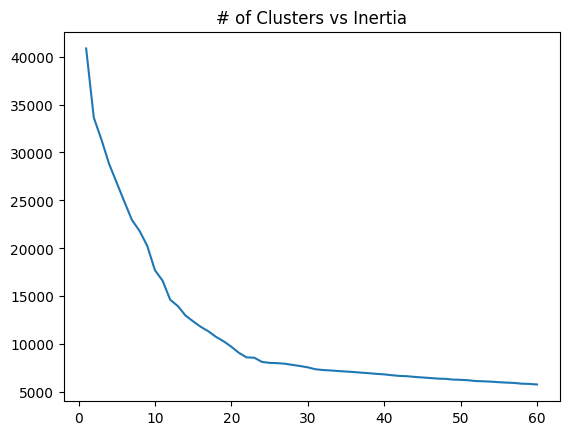

In [ ]:
k_inertia = []
k_means = []
for k in range(60):
    kmeans = KMeans(n_clusters=k+1,random_state=42,max_iter=100).fit(X_train_transformed)
    k_means.append(kmeans)
    k_inertia.append(kmeans.inertia_)
plt.plot(range(1,61),k_inertia)
plt.title("# of Clusters vs Inertia")

In [ ]:
s_scores=[]
for k in range(1,41,5):
    #kmeans = KMeans(n_clusters=k+2,random_state=42,max_iter=300).fit(X_train_transformed)
    kmeans = k_means[k]
    labels = kmeans.labels_
    #print(k+2,silhouette_score(X, labels, metric='euclidean'))
    s_scores.append(silhouette_score(X_train_transformed, labels, metric='euclidean'))
    print(k)

1
6
11
16
21
26
31
36


Text(0.5, 1.0, '# of Clusters vs Silhouette Score')

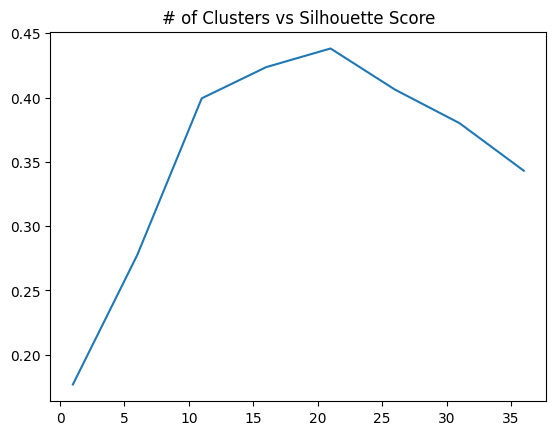

In [ ]:
plt.plot([1,6,11,16,21,26,31,36],s_scores)
plt.title('# of Clusters vs Silhouette Score')

In [ ]:
# going to go with 22 clusters as that could be argued as the elbow in the elbow plot, and the sihouette score maxes out around there

In [ ]:
# start the cluster model
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(X[discrete_vars])
kmeans_co = KMeans(n_clusters=22, random_state=77)
kmeans_co.fit(scaled_data)
clusters = kmeans_co.predict(scaled_data)
df_copy = df.copy()
df_copy['cluster']=clusters

In [ ]:
# run a few tests to see if the clustering seems reasonable
df_copy[df_copy['track_artist']=='Black Sabbath'].head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
10998,3eebg5U0X8EMw1Om4syYqY,Changes,Black Sabbath,35,1mDCh37cVQHLjD6e27Id4x,The Ultimate Collection,2016-10-28,Mega Rock Ballads: The Best Slow Rock Compilat...,6LJtRKgDpzM8ZbbwC0jLhe,rock,...,-12.244,1,0.0326,0.042100,0.000027,0.1090,0.187,81.264,282493,2
11020,1Ly0ssAgeM7YqdHptao8Oe,Paranoid,Black Sabbath,15,1iaBz2uUeN77vNBSVzSYId,Greatest Hits,2014-03-28,House Of The Rising Sun,1bMYfBHYBCRHY5LGkjlpSy,rock,...,-11.501,0,0.0722,0.000084,0.002390,0.1700,0.382,162.721,168440,14
11081,3IOQZRcEkplCXg6LofKqE9,Iron Man - 2014 Remaster,Black Sabbath,66,6r7LZXAVueS5DqdrvXJJK7,Paranoid (2014 Remaster),1970-09-18,House Of The Rising Sun,1bMYfBHYBCRHY5LGkjlpSy,rock,...,-10.875,1,0.0848,0.003490,0.001780,0.0437,0.425,155.588,355304,20
11446,1Y373MqadDRtclJNdnUXVc,Paranoid - 2016 Remaster,Black Sabbath,68,6r7LZXAVueS5DqdrvXJJK7,Paranoid (2014 Remaster),1970-09-18,Nikki Sixx's Top Pixx,5d1arTPDEr76KMg9geDinZ,rock,...,-12.051,0,0.0696,0.000045,0.000735,0.1760,0.450,163.015,168406,14
12050,5TFyNdCLlC1ZRuwczqaS97,Iron Man,Black Sabbath,1,714ndVxSx8lIWhQxdbcXIs,Paranoid,1970-09-18,"Classic Rock 70s 80s 90s, Rock Classics - 70s ...",3Ho3iO0iJykgEQNbjB2sic,rock,...,-9.522,1,0.0938,0.005210,0.004320,0.0803,0.538,154.573,354240,20
12363,5ERnPWGQc5QK7M7HW3rjC6,Paranoid,Black Sabbath,12,7DBES3oV6jjAmWob7kJg6P,Paranoid (Remastered),1970-09-18,Workday: Rock Classics,37i9dQZF1DX1lwxXvReaux,rock,...,-11.503,0,0.0744,0.000089,0.001640,0.1700,0.376,162.474,168440,14
12777,1jzDzZWeSDBg5fhNc3tczV,Paranoid,Black Sabbath,76,132qAo1cDiEJdA3fv4xyNK,Paranoid (2009 Remastered Version),1970-09-18,Permanent wave,0tOy7ZY4E2PadXIyj8zU43,rock,...,-11.514,0,0.0769,0.000078,0.004110,0.1750,0.376,162.734,168440,14
14295,5C4yy21AJ8AeMeK0fVQCZD,Paranoid,Black Sabbath,0,6dWxVdXbNaux60KZsO89rN,Absolute Rock Anthems,2008-07-07,Classic Hard Rock,1gAeQGQ7hr2q7IYmaejDW6,rock,...,-5.041,0,0.1410,0.000464,0.024400,0.1810,0.493,163.105,165600,14
14319,1sPTEnb7kZhNRavK7BQEW4,Iron Man,Black Sabbath,0,7fbHYPeKtW2XQfakwLPonr,Lords Of Dogtown,2005,Classic Hard Rock,1gAeQGQ7hr2q7IYmaejDW6,rock,...,-7.148,1,0.1580,0.000347,0.002460,0.1320,0.536,156.654,353880,20
14697,3l85BgDKG8LVAlEnHEU8lP,Tomorrow's Dream,Black Sabbath,0,2PoPhjSYlXmYfkNKHVq1cQ,Black Sabbath Vol. 4 (Remastered),1972-09-25,70s Hard Rock,6pZlZ20vt3aDjIKw98aBtQ,rock,...,-12.650,1,0.0388,0.047200,0.031000,0.1400,0.350,110.750,188775,2


In [ ]:
# test with the song Iron Man from the dataframe index 12050
selected_row = df_copy[discrete_vars+['cluster']].iloc[12050]
selected_row_scaled = scaler.transform([selected_row.drop('cluster')])
selected_row_cluster = kmeans_co.predict(selected_row_scaled)[0]
cluster_data = df_copy[df_copy['cluster'] == selected_row_cluster]
cluster_data_scaled = scaler.transform(cluster_data[discrete_vars])

distances = euclidean_distances(selected_row_scaled, cluster_data_scaled)
closest_indices = np.argsort(distances[0])[:6]
closest_rows = cluster_data.iloc[closest_indices]
closest_rows[['track_name','track_artist','track_album_name','key']+discrete_vars+['cluster']]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,track_name,track_artist,track_album_name,key,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
12050,Iron Man,Black Sabbath,Paranoid,9,0.339,0.824,-9.522,1,0.0938,0.005210,0.004320,0.0803,0.538,154.573,354240,20
14763,Iron Man,Black Sabbath,Greatest Hits,9,0.323,0.879,-7.257,1,0.1140,0.003050,0.004310,0.1000,0.522,155.588,353667,20
12673,Common People,Pulp,Different Class,0,0.314,0.797,-9.026,1,0.0380,0.005700,0.000056,0.0718,0.569,145.393,351627,20
14319,Iron Man,Black Sabbath,Lords Of Dogtown,9,0.283,0.849,-7.148,1,0.1580,0.000347,0.002460,0.1320,0.536,156.654,353880,20
11081,Iron Man - 2014 Remaster,Black Sabbath,Paranoid (2014 Remaster),9,0.336,0.792,-10.875,1,0.0848,0.003490,0.001780,0.0437,0.425,155.588,355304,20
1156,Not,Big Thief,Two Hands,11,0.422,0.788,-6.570,1,0.0556,0.101000,0.002820,0.1600,0.544,140.423,367093,20


In [ ]:
# results show a couple things:
#1. that there are slightly different versions of the same song in the dataset, you can see slightly different numerical characterists in each version
#2. it is clustering with obviously simliar songs as it has found a few versions as the closet matches

In [ ]:
df_copy[df_copy['track_artist']=='Vance Joy'].head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
4313,3JvrhDOgAt6p7K8mDyZwRd,Riptide,Vance Joy,78,5S9b8euumqMhQbMk0zzQdH,Dream Your Life Away (Special Edition),2014-09-09,A Loose Definition of Indie Poptimism,4ZO0wp9G8FA3X6oYNBzda6,pop,...,-6.694,1,0.0379,0.431,0.000000,0.1510,0.510,101.654,204280,5
15789,6FeGkJquvWWoAOa3rMM6EB,Riptide - FlicFlac Edit,Vance Joy,53,5jQhvxw1BMfsGQ8oTCT3Yp,Riptide (FlicFlac Edit),2014-03-10,Tropical Morning,0vbtbmyihyvl2MVYrdKdGw,latin,...,-7.934,1,0.0418,0.253,0.000692,0.0878,0.634,115.987,339310,1
16598,5UcDFuZnsgtXTuN7GO79Wf,Riptide - Live from Spotify London,Vance Joy,31,4VEuxNvtEzSIIdcbBFPhyR,Spotify Sessions,2014-11-10,Unplugged Hits 📣,5NTm3injIRkUMROsZr3C2O,latin,...,-13.506,1,0.0657,0.945,0.000030,0.1120,0.636,102.190,189893,12


In [ ]:
# test with the song Riptide by Vance Joy from the dataframe index 4313
selected_row = df_copy[discrete_vars+['cluster']].iloc[4313]
selected_row_scaled = scaler.transform([selected_row.drop('cluster')])
selected_row_cluster = kmeans_co.predict(selected_row_scaled)[0]
cluster_data = df_copy[df_copy['cluster'] == selected_row_cluster]
cluster_data_scaled = scaler.transform(cluster_data[discrete_vars])

distances = euclidean_distances(selected_row_scaled, cluster_data_scaled)
closest_indices = np.argsort(distances[0])[:6]
closest_rows = cluster_data.iloc[closest_indices]
closest_rows[['track_name','track_artist','track_album_name','key']+discrete_vars+['cluster']]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,track_name,track_artist,track_album_name,key,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
4313,Riptide,Vance Joy,Dream Your Life Away (Special Edition),1,0.484,0.731,-6.694,1,0.0379,0.431,0.000000,0.1510,0.510,101.654,204280,5
640,Say It Again,AJ Mitchell,Say It Again,1,0.510,0.710,-7.516,1,0.0874,0.442,0.000250,0.0783,0.511,119.951,206930,5
26472,Easy on Me,R-Cue,Easy on Me,10,0.499,0.672,-5.380,1,0.0374,0.539,0.000000,0.1060,0.478,92.984,217097,5
15984,Torn,Campsite Dream,Torn,3,0.602,0.719,-5.095,1,0.0769,0.383,0.000000,0.1210,0.503,95.873,187745,5
2195,"You Are the Music in Me - From ""High School Mu...",Troy,High School Musical: Be Mine,5,0.601,0.759,-4.467,1,0.0452,0.358,0.000000,0.1010,0.475,102.006,208947,5
20587,Everybody Wants to Rule the World,Love Canon,Greatest Hits Vol. 2,2,0.414,0.713,-6.523,1,0.0424,0.422,0.000332,0.1030,0.531,118.023,265267,5


In [ ]:
df_copy[df_copy['track_artist']=='Noah Kahan'].head(10)

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
3777,7apizLyhMRutg3ccXvr2qv,Hurt Somebody,Noah Kahan,65,4tpVFjYKSR6ivXVK5YXEc4,Hurt Somebody,2018-01-12,POPTIMISM,6lWMi4lPiiPwDqn8ZpeyAY,pop,...,-5.135,1,0.3130,0.338,0.000000,0.262,0.473,114.983,168640,5
4116,6IW6mD0OrfYXXkTgdLBQ83,Cynic,Noah Kahan,64,3DNQrMjvVGiueVrj1qquJd,Busyhead,2019-06-14,2019 in Indie Poptimism,16RNbqnNCCLlBJti7JU5nc,pop,...,-5.634,1,0.0338,0.230,0.000001,0.325,0.962,103.007,208493,17
20224,7nDFTHHwfe32a8qdp9XqPy,False Confidence,Noah Kahan,74,3DNQrMjvVGiueVrj1qquJd,Busyhead,2019-06-14,Pop Hits 2020,5TDtuKDbOhrfW7C58XnriZ,r&b,...,-7.770,1,0.0456,0.163,0.000000,0.138,0.330,108.980,223400,2


In [ ]:
# test with the song False Confidence by Noah Kahan from the dataframe index 20224
selected_row = df_copy[discrete_vars+['cluster']].iloc[20224]
selected_row_scaled = scaler.transform([selected_row.drop('cluster')])
selected_row_cluster = kmeans_co.predict(selected_row_scaled)[0]
cluster_data = df_copy[df_copy['cluster'] == selected_row_cluster]
cluster_data_scaled = scaler.transform(cluster_data[discrete_vars])

distances = euclidean_distances(selected_row_scaled, cluster_data_scaled)
closest_indices = np.argsort(distances[0])[:6]
closest_rows = cluster_data.iloc[closest_indices]
closest_rows[['track_name','track_artist','track_album_name','key']+discrete_vars+['cluster']]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


,track_name,track_artist,track_album_name,key,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
20224,False Confidence,Noah Kahan,Busyhead,6,0.414,0.663,-7.770,1,0.0456,0.1630,0.000000,0.138,0.330,108.980,223400,2
108,No Sleep (feat. Bonn),Martin Garrix,No Sleep (feat. Bonn),11,0.440,0.635,-6.385,1,0.0326,0.1290,0.000000,0.121,0.327,128.133,207095,2
2332,Ironic - 2015 Remaster,Alanis Morissette,Jagged Little Pill (Remastered),11,0.408,0.582,-8.305,1,0.0508,0.2180,0.000000,0.159,0.365,114.926,230000,2
1102,Ode to Viceroy,Mac DeMarco,2,2,0.514,0.632,-6.305,1,0.0501,0.2080,0.013200,0.115,0.310,94.569,233818,2
26570,For You,Stesso,For You,10,0.399,0.645,-5.983,1,0.0734,0.0895,0.000000,0.100,0.245,122.603,202739,2
27692,Desire (feat. Darrein Safron),GAWVI,Holding Hue - EP,7,0.438,0.617,-8.963,1,0.0467,0.0767,0.000017,0.219,0.392,119.854,229990,2


Song Recommendations using DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

# Prepare data for DBSCAN using the defined and fitted pipeline from the k-means section
X = df[categorical_vars + numerical_preds]
X_train_transformed_dbscan = pipeline_full.transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.9, min_samples=5)
df['cluster_dbscan'] = dbscan.fit_predict(X_train_transformed_dbscan)

# Let's create a helper function to run some recommended song tests
def recommended_by_songs_dbscan( song_name, num_recommendations = 5):
  try:
      song_cluster = df[df['track_name'] == song_name]['cluster_dbscan'].values[0]
  except IndexError:
      print(f"Song '{song_name}' not found in the dataset.")
      return pd.DataFrame()

  if song_cluster == -1:
      print(f"'{song_name}' is classified as noise. Recommending from other clustered songs.")
      recommended_songs = df[df['cluster_dbscan'] != -1].sample(n=min(num_recommendations, len(df[df['cluster_dbscan'] != -1])))
  else:
      recommended_songs = df[(df['cluster_dbscan'] == song_cluster) & (df['track_name'] != song_name)].sample(n=min(num_recommendations, len(df[(df['cluster_dbscan'] == song_cluster) & (df['track_name'] != song_name)])))

  return recommended_songs[['track_name', 'track_artist']]

def recommended_by_artist_dbscan( track_artist, num_recommendations = 5):
  artist_songs = df[df['track_artist'] == track_artist]
  if artist_songs.empty:
      print(f"No songs found for artist '{track_artist}'.")
      return pd.DataFrame()

  # Get the cluster of a random song by the artist
  try:
      artist_song_cluster = artist_songs.sample(1)['cluster_dbscan'].values[0]
  except KeyError:
      print("The 'cluster_dbscan' column does not exist in the DataFrame.")
      return pd.DataFrame()

  if artist_song_cluster == -1:
      print(f"Songs by '{track_artist}' are classified as noise. Recommending from other clustered songs.")
      recommended_songs = df[df['cluster_dbscan'] != -1].sample(n=min(num_recommendations, len(df[df['cluster_dbscan'] != -1])))
  else:
      # Recommend other songs from the same cluster (can be by different artists)
      recommended_songs = df[df['cluster_dbscan'] == artist_song_cluster].sample(n=min(num_recommendations, len(df[df['cluster_dbscan'] == artist_song_cluster])))

  return recommended_songs[['track_name', 'track_artist']]

# Test some recommendations based on a specific track
recommendations = recommended_by_songs_dbscan( 'Iron Man', num_recommendations = 5)
print(recommendations)
# Test some recommendations based on a artist
recommendations = recommended_by_artist_dbscan( 'Black Sabbath', num_recommendations = 5)
print(recommendations)


                                    track_name       track_artist
22898                               Best Of Me  Chrisette Michele
4484   Every Little Beat (feat. Allie Crystal)     Anthem Academy
1053                                     MIROH         Stray Kids
1441                                  So Close   Jennette McCurdy
1676            How Far I'll Go - From "Moana"       Alessia Cara
                     track_name    track_artist
11081  Iron Man - 2014 Remaster   Black Sabbath
11500                   Valerie   Steve Winwood
11680         Gimme Three Steps  Lynyrd Skynyrd
13188                    Wheels    Foo Fighters
28291                 Push Play            Zedd


In [ ]:
# Test some recommendations based on a specific track
recommendations = recommended_by_artist_dbscan( 'Queen', num_recommendations = 5)
print(recommendations)

                          track_name     track_artist
19837                     Piano Song  Eryn Allen Kane
22061                        Take Me     Teedra Moses
28113  Jump - Armin van Buuren Remix        Van Halen
6149                         Whiskey              VIK
186                   Not in Control           Glaceo


## Decision Trees

In [ ]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, Normalizer, StandardScaler
from sklearn.compose import ColumnTransformer
from scipy.stats import randint
from sklearn.ensemble import (AdaBoostClassifier,
                             ExtraTreesClassifier, GradientBoostingClassifier)
import matplotlib.pyplot as plt

In [ ]:
data=df.copy()

In [ ]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode',
            'speechiness', 'acousticness', 'instrumentalness',
            'liveness', 'valence', 'tempo', 'duration_ms']

In [ ]:
X = data[features]
y = np.where(data['track_popularity'] > 45, 1, 0)  # 1=popular, 0=not popular; 45 treshold based on median

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Base Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

              precision    recall  f1-score   support

           0       0.57      0.57      0.57      3119
           1       0.48      0.48      0.48      2552

    accuracy                           0.53      5671
   macro avg       0.53      0.53      0.53      5671
weighted avg       0.53      0.53      0.53      5671



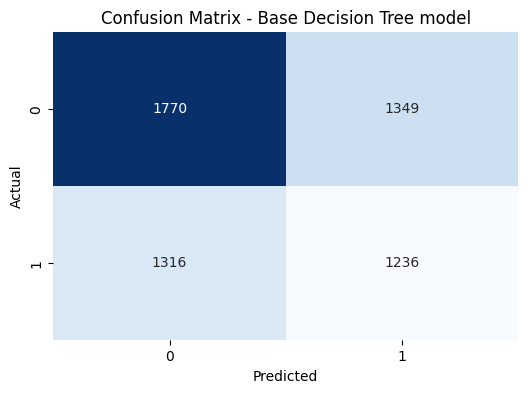

In [ ]:
# Print classification report and plot confusion matrix
print(classification_report(y_test, y_pred))
cm_base = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm_base, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Base Decision Tree model')
plt.show()

In [ ]:
# Hyperparameter tuning with RandomizedSearchCV
param_dist = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [ ]:
random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                 param_distributions=param_dist,
                                 n_iter=20, cv=5, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=20,
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

Best Decision Tree with RandomizedSearchCV
              precision    recall  f1-score   support

           0       0.60      0.69      0.64      3119
           1       0.53      0.44      0.48      2552

    accuracy                           0.57      5671
   macro avg       0.57      0.56      0.56      5671
weighted avg       0.57      0.57      0.57      5671



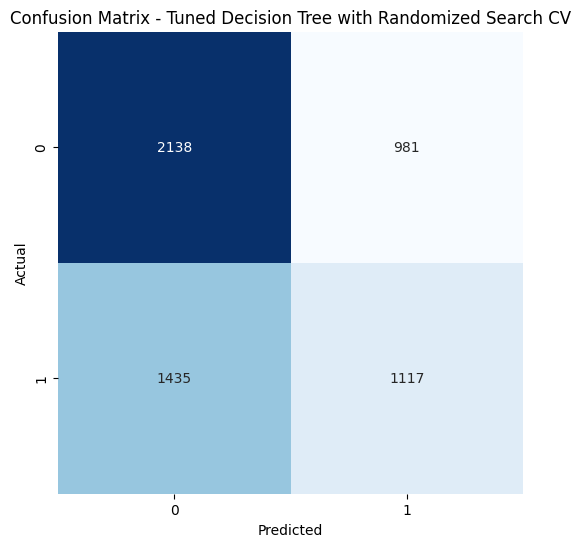

In [ ]:
print("Best Decision Tree with RandomizedSearchCV")
best_dt = random_search.best_estimator_
y_pred = best_dt.predict(X_test)
print(classification_report(y_test, y_pred))
cm_rand = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm_rand, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Tuned Decision Tree with Randomized Search CV')
plt.show()

              precision    recall  f1-score   support

           0       0.60      0.69      0.64      3119
           1       0.54      0.44      0.49      2552

    accuracy                           0.58      5671
   macro avg       0.57      0.57      0.56      5671
weighted avg       0.57      0.58      0.57      5671



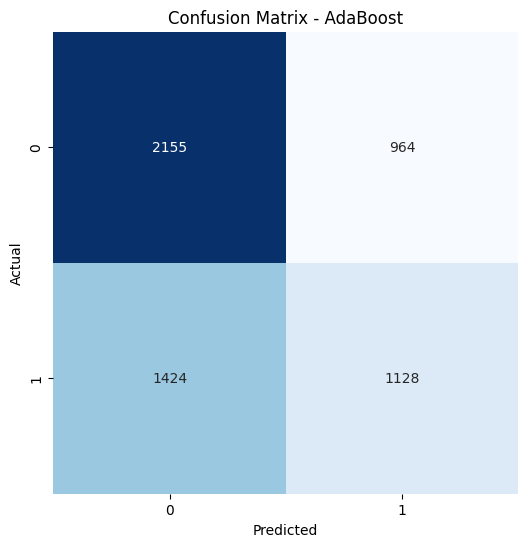

In [ ]:
# AdaBoost Classifier
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
print(classification_report(y_test, y_pred))
cm_ada = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

              precision    recall  f1-score   support

           0       0.62      0.71      0.66      3119
           1       0.56      0.46      0.51      2552

    accuracy                           0.60      5671
   macro avg       0.59      0.59      0.58      5671
weighted avg       0.59      0.60      0.59      5671



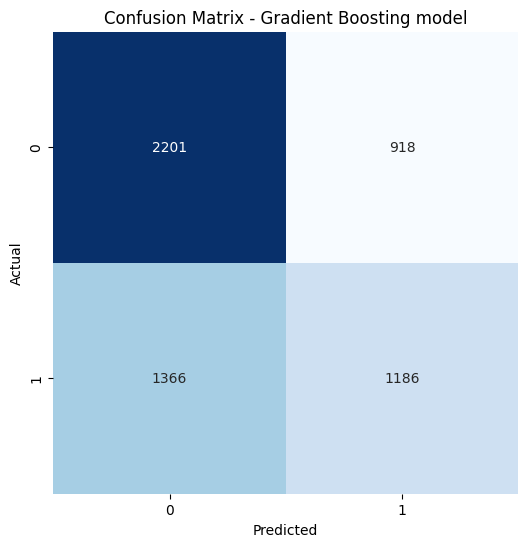

In [ ]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print(classification_report(y_test, y_pred))
cm_gb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting model')
plt.show()

In [ ]:
# Function to predict popularity for new songs
   # Returns: 1 if predicted popular; 0 if predicted not popular

def predict_popularity(model, song_features):
    features_df = pd.DataFrame([song_features])

    # Ensure correct column order
    features_df = features_df[features]

    # Make prediction
    prediction = model.predict(features_df)[0]
    probability = model.predict_proba(features_df)[0][1]

    return prediction, probability

In [ ]:
# Example song:
song_def = {'danceability': 0.75,'energy': 0.85,'key': 5,'loudness': -2.634,'mode': 1,'speechiness': 0.05,'acousticness': 0.01,'instrumentalness': 0.0,'liveness': 0.1,'valence': 0.7,'tempo': 120,'duration_ms': 200000}

In [ ]:
# Let's predict song popularity using Gradient boosting model
prediction, confidence = predict_popularity(gb, song_def)
print(f"\nGradient boosting model prediction:")
print(f"\nPrediction: {'Popular' if prediction == 1 else 'Not Popular'}")
print(f"Confidence: {confidence:.2%}")


Gradient boosting model prediction:

Prediction: Popular
Confidence: 57.04%


In [ ]:
# Let's predict song popularity using Ada model
prediction, confidence = predict_popularity(ada, song_def)
print(f"\nAdaBoost Classifier model prediction:")
print(f"\nPrediction: {'Popular' if prediction == 1 else 'Not Popular'}")
print(f"Confidence: {confidence:.2%}")


AdaBoost Classifier model prediction:

Prediction: Not Popular
Confidence: 47.20%
